In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv(r"C:\Users\ROSHAN\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv")

In [3]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
cols_to_drop = ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']
data_cleaned = data.drop(columns=cols_to_drop)

In [5]:
data_cleaned.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
# Impute missing values for numerical columns with median
num_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in num_cols:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

In [7]:
# Impute missing values for categorical columns with mode
cat_cols = ['Weather_Condition', 'City', 'Zipcode', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in cat_cols:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

In [8]:
data_cleaned['Description'].fillna('No Description', inplace=True)


In [9]:
data_cleaned.dropna(inplace=True)

In [10]:
missing_values = data_cleaned.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Sig

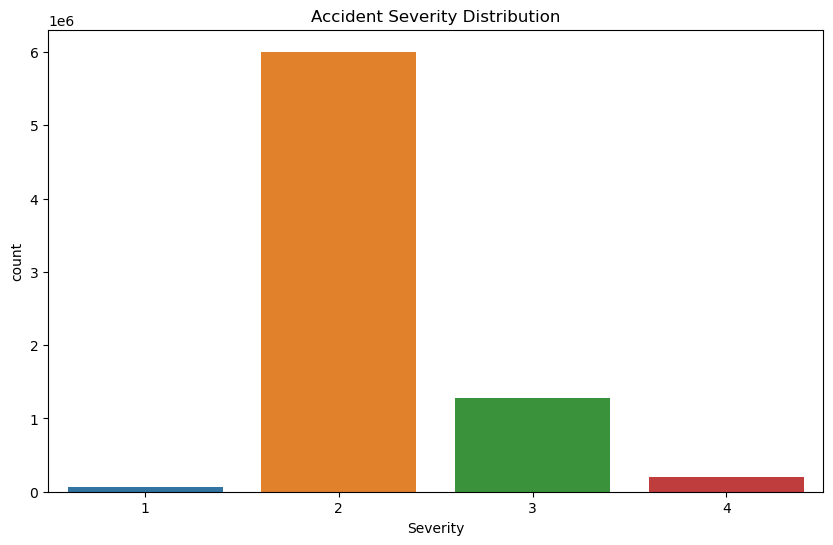

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Severity', data=data_cleaned)
plt.title('Accident Severity Distribution')
plt.show()

In [13]:
# Step 1: Convert 'Start_Time' to datetime
data_cleaned['Start_Time'] = pd.to_datetime(data_cleaned['Start_Time'])

# Step 2: Extract the hour from 'Start_Time'
data_cleaned['Hour'] = data_cleaned['Start_Time'].dt.hour

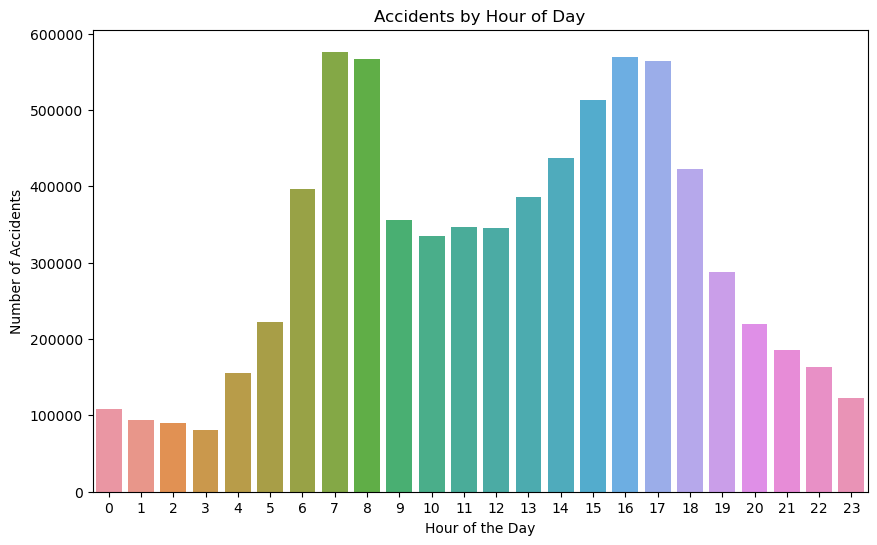

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data_cleaned)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

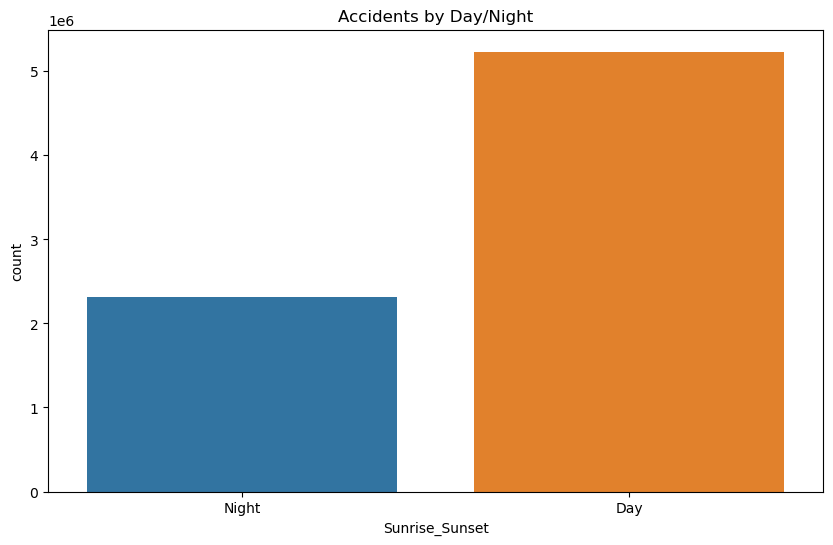

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sunrise_Sunset', data=data_cleaned)
plt.title('Accidents by Day/Night')
plt.show()

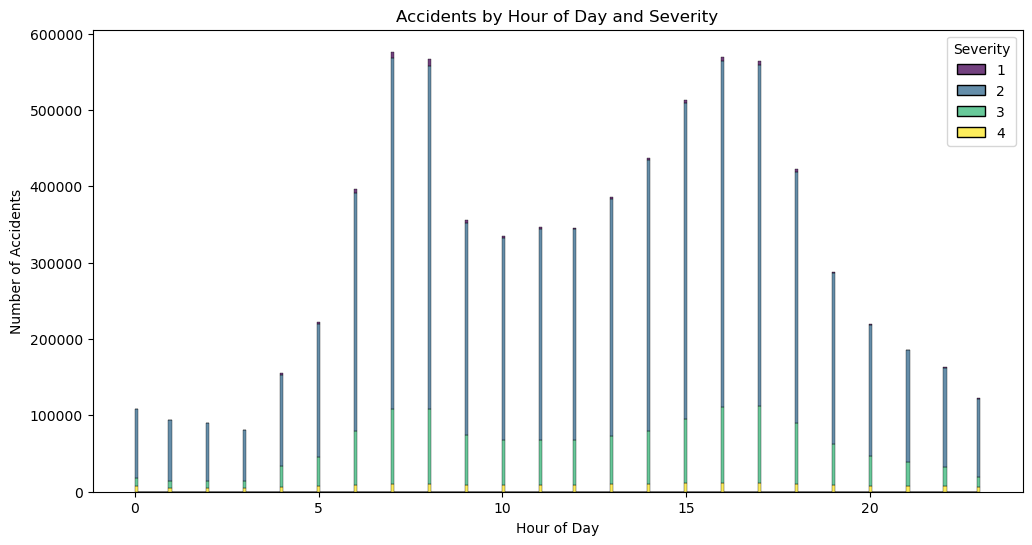

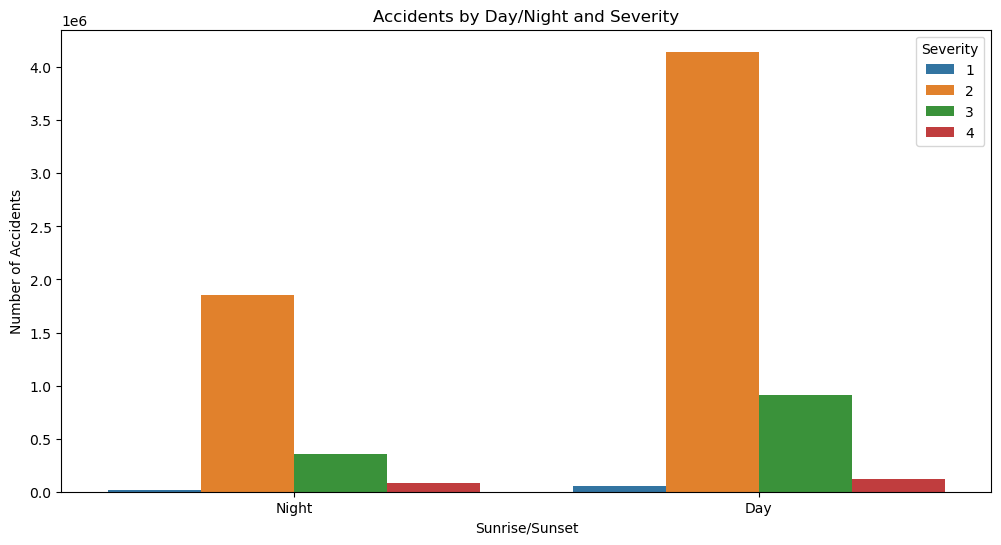

In [16]:
# Accidents by hour of day (categorized by severity)
plt.figure(figsize=(12,6))
sns.histplot(data=data_cleaned, x='Hour', hue='Severity', multiple='stack', palette='viridis')
plt.title('Accidents by Hour of Day and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by Sunrise_Sunset
plt.figure(figsize=(12,6))
sns.countplot(data=data_cleaned, x='Sunrise_Sunset', hue='Severity')
plt.title('Accidents by Day/Night and Severity')
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Number of Accidents')
plt.show()